In [58]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



df = pd.read_csv("dataset_planification_transport_LK.csv")

df.head()

,trajet_id,ville_depart,ville_arrivee,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,type_bus,jour_semaine,periode_depart,condition_route,carburant_litre,satisfaction_client
0,1,Tsévié,Tsévié,56.0,7.2,163.0,8847.0,52.0,50.0,Climatisé,Dimanche,Après-midi,Bonne,43.4,3
1,2,Sokodé,Tsévié,NaN,2.9,124.0,9401.0,39.0,NaN,Standard,Dimanche,NaN,Moyenne,73.7,4
2,3,Dapaong,Sokodé,496.0,1.6,163.0,9228.0,56.0,NaN,Standard,Dimanche,Soir,Bonne,26.5,2
3,4,Sokodé,Lomé,463.0,8.8,88.0,3618.0,NaN,NaN,VIP,Jeudi,Matin,Mauvaise,42.5,4
4,5,Kara,Dapaong,130.0,3.4,32.0,7518.0,67.0,50.0,VIP,Dimanche,Après-midi,Mauvaise,21.5,1


In [35]:
df.info

<bound method DataFrame.info of       trajet_id ville_depart ville_arrivee  distance_km  duree_prevue_h  \
0             1       Tsévié        Tsévié         56.0             7.2   
1             2       Sokodé        Tsévié          NaN             2.9   
2             3      Dapaong        Sokodé        496.0             1.6   
3             4       Sokodé          Lomé        463.0             8.8   
4             5         Kara       Dapaong        130.0             3.4   
...         ...          ...           ...          ...             ...   
1995       1996         Lomé           NaN        428.0             9.1   
1996       1997       Tsévié        Tsévié        406.0             NaN   
1997       1998     Atakpamé        Sokodé        615.0             2.2   
1998       1999       Tsévié        Tsévié        428.0            11.7   
1999       2000     Atakpamé        Tsévié        458.0             7.2   

      retard_min  prix_billet  nb_passagers  capacite_bus   type_bus  \
0          163.0       8847.0          52.0          50.0  Climatisé   
1          124.0       9401.0          39.0           NaN   Standard   
2          163.0       9228.0          56.0           NaN   Standard   
3           88.0       3618.0           NaN           NaN        VIP   
4           32.0       7518.0          67.0          50.0        VIP   
...          ...          ...           ...           ...        ...   
1995       137.0       1851.0          33.0          50.0   Standard   
1996         NaN       6832.0          68.0          70.0   Standard   
1997        28.0       3754.0           9.0          50.0   Standard   
1998         0.0       4182.0          14.0          30.0  Climatisé   
1999        77.0       6570.0           8.0          40.0        VIP   

     jour_semaine periode_depart condition_route  carburant_litre  \
0        Dimanche     Après-midi           Bonne             43.4   
1        Dimanche            NaN         Moyenne             73.7   
2        Dimanche           Soir           Bonne             26.5   
3           Jeudi          Matin        Mauvaise             42.5   
4        Dimanche     Après-midi        Mauvaise             21.5   
...           ...            ...             ...              ...   
1995        Lundi          Matin         Moyenne             38.2   
1996     Dimanche     Après-midi         Moyenne             62.7   
1997     Vendredi           Soir             NaN             46.0   
1998        Lundi          Matin           Bonne             18.7   
1999     Vendredi     Après-midi         Moyenne             76.3   

      satisfaction_client  
0                       3  
1                       4  
2                       2  
3                       4  
4                       1  
...                   ...  
1995                    4  
1996                    3  
1997                    1  
1998                    4  
1999                    1  

[2000 rows x 15 columns]>

In [60]:
df.describe()

,trajet_id,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,carburant_litre,satisfaction_client
count,2000.000000,1840.000000,1840.000000,1840.000000,1840.000000,1836.000000,1840.000000,1840.000000,2000.00000
mean,1000.500000,352.983696,6.775326,91.687500,6726.460326,37.994009,50.315217,47.511196,2.99750
std,577.494589,173.609929,2.975420,51.889587,3071.395956,19.120825,13.968371,18.564397,1.39695
min,1.000000,50.000000,1.500000,0.000000,1528.000000,5.000000,30.000000,15.000000,1.00000
25%,500.750000,203.000000,4.200000,48.000000,4008.000000,21.000000,40.000000,31.575000,2.00000
50%,1000.500000,355.000000,6.900000,93.000000,6599.000000,39.000000,50.000000,47.350000,3.00000
75%,1500.250000,503.000000,9.300000,137.000000,9527.000000,54.000000,60.000000,63.500000,4.00000
max,2000.000000,649.000000,12.000000,179.000000,11997.000000,79.000000,70.000000,80.000000,5.00000


In [36]:
df = df[df["nb_passagers"] <= df["capacite_bus"]]
df = df[df["retard_min"] >= 0]
df = df[df["carburant_litre"] > 0]

In [37]:
df = df[df["distance_km"] > 0]
df = df[df["duree_prevue_h"] > 0]

In [38]:
df["taux_remplissage"] = df["nb_passagers"] / df["capacite_bus"]


In [39]:
df["retard_par_km"] = df["retard_min"] / df["distance_km"]

In [40]:
df["cout_carburant_passager"] = (
    df["carburant_litre"] / df["nb_passagers"]
)

In [41]:
df["trajet_risque"] = (
    (df["retard_min"] > 30) | (df["taux_remplissage"] > 1)
).astype(int)

In [42]:
X = df.drop("trajet_risque", axis=1)
y = df["trajet_risque"]


In [43]:
numeric_features = [
    "distance_km",
    "duree_prevue_h",
    "retard_min",
    "prix_billet",
    "nb_passagers",
    "capacite_bus",
    "carburant_litre",
    "taux_remplissage",
    "retard_par_km",
    "cout_carburant_passager"
]

categorical_features = [
    "ville_depart",
    "ville_arrivee",
    "type_bus",
    "jour_depart",
    "periode_depart",
    "etat_route"
]

In [44]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_features),
        ("cat", categorical_pipeline, categorical_features)
    ]
)


In [45]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [47]:
model.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [ ]:
y_pred = model.predict(X_test)

print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

In [ ]:
nouveau_trajet = pd.DataFrame({
    "ville_depart": ["Lomé"],
    "ville_arrivee": ["Kara"],
    "distance": [420],
    "duree_prevue": [8],
    "retard": [20],
    "prix_billet": [7000],
    "nombre_passagers": [55],
    "capacite_bus": [60],
    "type_bus": ["Climatisé"],
    "jour_depart": ["Vendredi"],
    "periode_depart": ["Soir"],
    "etat_route": ["Moyen"],
    "consommation_carburant": [85],
    "taux_remplissage": [55/60],
    "retard_par_km": [20/420],
    "cout_carburant_passager": [85/55]
    })

prediction = model.predict(nouveau_trajet)

print("\nTrajet à risque ?" , "OUI" if prediction[0] == 1 else "NON")

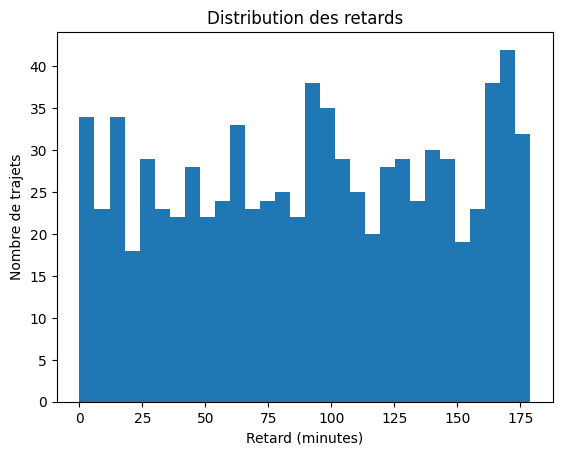

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["retard_min"], bins=30)
plt.xlabel("Retard (minutes)")
plt.ylabel("Nombre de trajets")
plt.title("Distribution des retards")
plt.show()


👉 Interprétation :

Beaucoup de valeurs élevées → problème de planification

Longue queue → certains axes très problématiques

<Figure size 640x480 with 0 Axes>

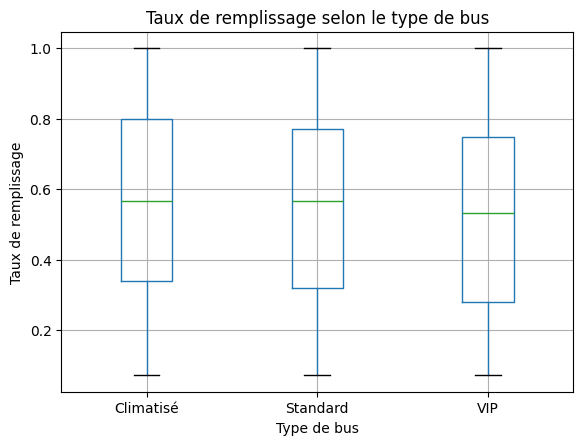

In [50]:
plt.figure()
df.boxplot(column="taux_remplissage", by="type_bus")
plt.xlabel("Type de bus")
plt.ylabel("Taux de remplissage")
plt.title("Taux de remplissage selon le type de bus")
plt.suptitle("")
plt.show()


👉 Interprétation :

Médiane > 1 → surcharge

Médiane < 0.5 → bus sous-utilisés

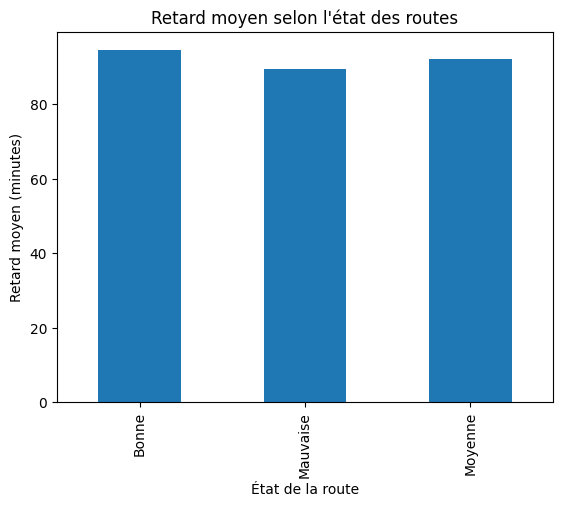

In [53]:
retard_route = df.groupby("condition_route")["retard_min"].mean()

plt.figure()
retard_route.plot(kind="bar")
plt.xlabel("État de la route")
plt.ylabel("Retard moyen (minutes)")
plt.title("Retard moyen selon l'état des routes")
plt.show()


👉 Interprétation :

Routes « Mauvais » → prioriser horaires plus larges ou bus adaptés

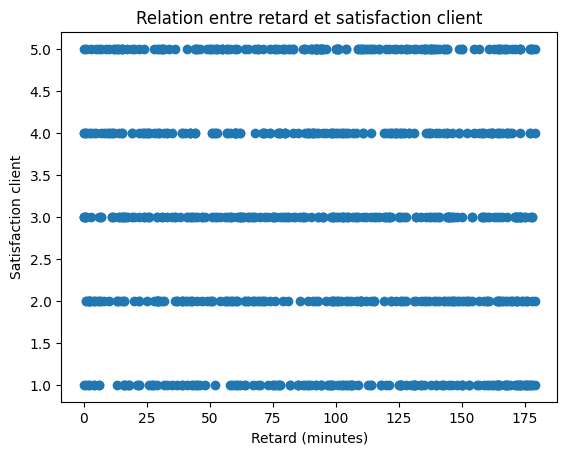

In [54]:
plt.figure()
plt.scatter(df["retard_min"], df["satisfaction_client"])
plt.xlabel("Retard (minutes)")
plt.ylabel("Satisfaction client")
plt.title("Relation entre retard et satisfaction client")
plt.show()


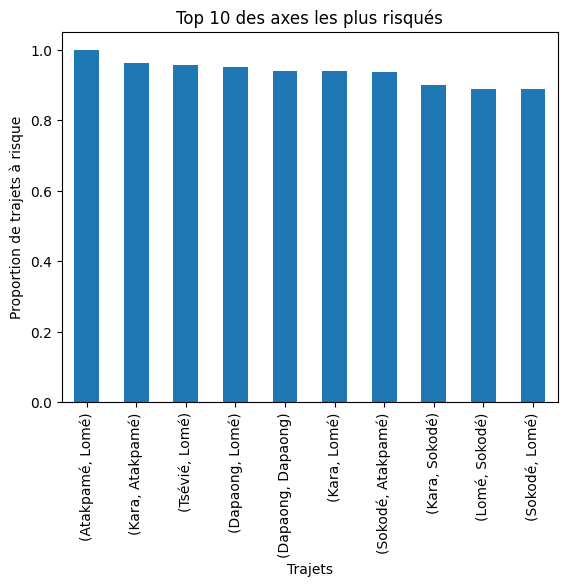

In [55]:
trajets_risque = (
    df.groupby(["ville_depart", "ville_arrivee"])["trajet_risque"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
trajets_risque.plot(kind="bar")
plt.xlabel("Trajets")
plt.ylabel("Proportion de trajets à risque")
plt.title("Top 10 des axes les plus risqués")
plt.show()
